# Sheet 1 - Data Engineering
The dataset is downloaded from Kaggle: https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset

## 2a / 2b

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./Data/user_behavior_dataset.csv')
df.set_index('User ID', inplace=True)

## Check the data

In [2]:
df.sample(10)

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
User ID,,,,,,,,,,
392,OnePlus 9,Android,337,6.1,1901,76,1359,58,Male,4
375,OnePlus 9,Android,69,1.3,434,12,164,42,Male,1
476,Samsung Galaxy S21,Android,412,6.2,2201,68,1085,54,Female,4
360,Samsung Galaxy S21,Android,230,4.6,1325,55,845,54,Female,3
135,Xiaomi Mi 11,Android,83,1.6,303,19,285,51,Male,1
593,Samsung Galaxy S21,Android,379,7.7,1809,64,1050,22,Female,4
685,Google Pixel 5,Android,218,4.0,1221,47,822,25,Male,3
480,Samsung Galaxy S21,Android,189,4.8,1681,59,795,57,Male,3
329,OnePlus 9,Android,88,1.6,420,12,274,31,Female,1


## 2c

In [3]:
# Show Datatypes
df.dtypes

Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
User Behavior Class             int64
dtype: object

In [4]:
df.describe().round(2)

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00,700.00,700.00,700.00,700.00,700.00,700.00
mean,271.13,5.27,1525.16,50.68,929.74,38.48,2.99
std,177.20,3.07,819.14,26.94,640.45,12.01,1.40
min,30.00,1.00,302.00,10.00,102.00,18.00,1.00
25%,113.25,2.50,722.25,26.00,373.00,28.00,2.00
50%,227.50,4.90,1502.50,49.00,823.50,38.00,3.00
75%,434.25,7.40,2229.50,74.00,1341.00,49.00,4.00
max,598.00,12.00,2993.00,99.00,2497.00,59.00,5.00


In [5]:
 print(f"How many total unique values are there in this data set? \n{df.nunique()}")

How many total unique values are there in this data set? 
Device Model                    5
Operating System                2
App Usage Time (min/day)      387
Screen On Time (hours/day)    108
Battery Drain (mAh/day)       628
Number of Apps Installed       86
Data Usage (MB/day)           585
Age                            42
Gender                          2
User Behavior Class             5
dtype: int64


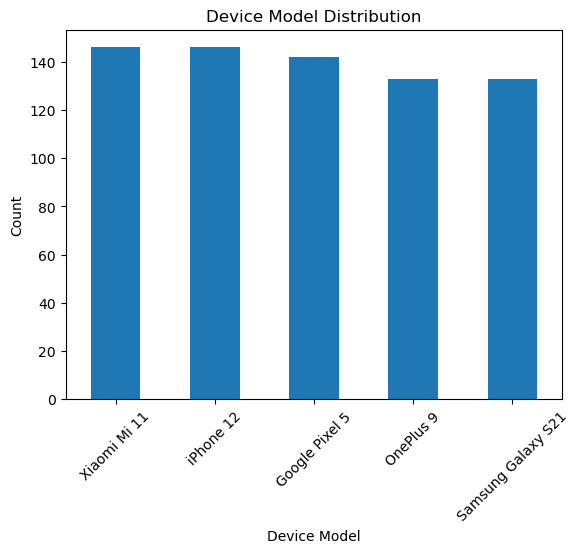

In [6]:
df['Device Model'].value_counts().plot(kind='bar')
plt.title('Device Model Distribution')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Device Model')
plt.show()


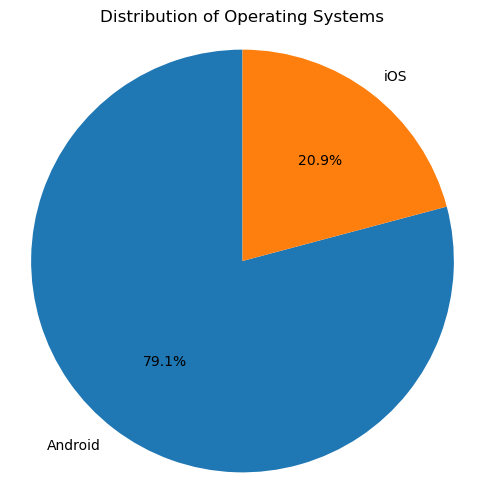

In [7]:
os_counts = df['Operating System'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(os_counts, labels=os_counts.index, startangle= 90, autopct='%1.1f%%')
plt.title('Distribution of Operating Systems')
plt.axis('equal') 
plt.show()

In [8]:
usage_by_os = df.groupby('Operating System')['App Usage Time (min/day)'].mean().round(2)
plt.show()

age_by_os = df.groupby('Operating System')['Age'].mean().round(2)
print("\n Age by Operating System",age_by_os)

age_by_device = df.groupby('Device Model')['Age'].mean().round(2)
print("\n Age by Device",age_by_device)

battery_per_device = df.groupby('Device Model')['Battery Drain (mAh/day)'].mean().round(2)
print("\n Battery Drain by Device",battery_per_device)



 Age by Operating System Operating System
Android    38.36
iOS        38.96
Name: Age, dtype: float64

 Age by Device Device Model
Google Pixel 5        37.77
OnePlus 9             38.88
Samsung Galaxy S21    39.11
Xiaomi Mi 11          37.77
iPhone 12             38.96
Name: Age, dtype: float64

 Battery Drain by Device Device Model
Google Pixel 5        1475.68
OnePlus 9             1523.85
Samsung Galaxy S21    1504.57
Xiaomi Mi 11          1528.88
iPhone 12             1589.51
Name: Battery Drain (mAh/day), dtype: float64


## Reflection of Dataset
- The dataset is mainly equal distributed among viewed datapoints, so it wasn't possible to find big learnings
- The dataset itself is complete and there is no missing data
- The dataset could include more different devices

# Excersise 3

In [9]:
import dash

In [10]:
df['Age Group'] = pd.cut(df['Age'], bins=range(18, 59, 10), labels=['18-27', '28-37', '38-47', '48-59'])
df.sample(10)

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Age Group
User ID,,,,,,,,,,,
459,iPhone 12,iOS,56,1.0,547,10,142,58,Female,1,48-59
89,Xiaomi Mi 11,Android,137,3.3,839,31,348,34,Female,2,28-37
273,Google Pixel 5,Android,105,2.2,1002,29,453,31,Female,2,28-37
200,Xiaomi Mi 11,Android,126,2.8,971,32,431,35,Female,2,28-37
670,Samsung Galaxy S21,Android,160,3.2,648,31,339,27,Female,2,18-27
655,Google Pixel 5,Android,594,10.5,2839,91,1647,56,Male,5,48-59
633,iPhone 12,iOS,496,10.2,2587,84,1921,56,Female,5,48-59
101,Google Pixel 5,Android,41,1.1,389,15,136,53,Male,1,48-59
186,Google Pixel 5,Android,498,10.7,2738,94,1995,42,Male,5,38-47


In [11]:
from dash import Dash, html, dcc, Input, Output, callback
import plotly.express as px

app = Dash()
battery_per_device = df.groupby('Device Model')['Battery Drain (mAh/day)'].mean().round(2)

fig = px.bar(df, x=df['Device Model'].unique(), 
        y=battery_per_device, barmode="group", 
        labels={'x':'Device Model', 'y':'Battery Drain (mAh/day)'},
        title='Battery Drain by Device Model')

app.layout = html.Div([
    html.Div([
        dcc.Graph(
        id='example-graph',
        figure=fig
    )
    ], style={'width': '80%', 'display': 'inline-block'}),
    html.Div([
        
      
    dcc.Dropdown(
        id='dropdown',
        options=[{'label': col, 'value': col} for col in ['Device Model', 'Operating System',
        'Gender', 'Age Group']],value='Gender'

    )
    , dcc.Graph(id='graph-with-dropdown') 
    ], style={'width': '80%', 'display': 'inline-block'})

])

@callback(
    Output('graph-with-dropdown', 'figure'),
    Input('dropdown', 'value'))
def update_figure(selected_value):
    grouped_df = df.groupby(selected_value)['App Usage Time (min/day)'].mean().reset_index()


    fig = px.bar(grouped_df, x=selected_value, y='App Usage Time (min/day)',
                 labels={selected_value: selected_value, 'App Usage Time (min/day)': 'App Usage Time (min/day)'},
                 title=f'App Usage Time by {selected_value}')

    fig.update_layout(transition_duration=500)

    return fig

app.run_server(mode='inline')


/var/folders/vd/bb2y2m3x70q9tythmbcl1kkc0000gn/T/ipykernel_63051/2076219576.py:37: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/vd/bb2y2m3x70q9tythmbcl1kkc0000gn/T/ipykernel_63051/2076219576.py:37: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/vd/bb2y2m3x70q9tythmbcl1kkc0000gn/T/ipykernel_63051/2076219576.py:37: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

